In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=1000,n_features=2,centers=3)

In [7]:
x

array([[ 0.21645915,  5.14148736],
       [ 6.5700466 ,  2.63333476],
       [ 0.85836676,  4.7815316 ],
       ...,
       [ 6.24917686, -4.2067903 ],
       [ 6.40467805,  1.64041841],
       [ 0.91775301,  5.77984827]], shape=(1000, 2))

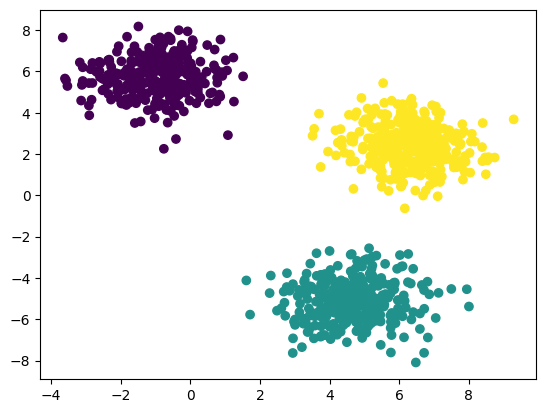

In [12]:
plt.scatter(x[:,0],x[:,1],c=y)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [29]:
x

array([[-0.95734908,  0.88794634],
       [ 0.98925099,  0.34993454],
       [-0.76068264,  0.81073395],
       ...,
       [ 0.89094353, -1.1173079 ],
       [ 0.93858569,  0.13694882],
       [-0.742488  ,  1.02487808]], shape=(1000, 2))

In [21]:
from sklearn.cluster import KMeans


Choosing the value of K: 
2 methods:

In [30]:
#1) Elbow methods:
wcss=[]
for i in range(1,12):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(x)
    wcss.append(model.inertia_)

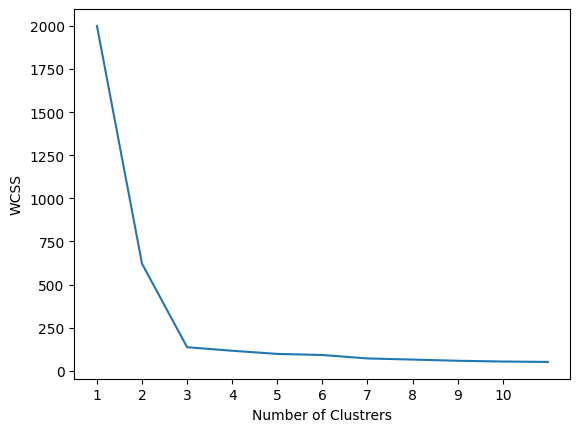

In [31]:
plt.plot(range(1,12),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [33]:
model=KMeans(n_clusters=3,init='k-means++')
model.fit(x)
y_pred=model.predict(x)


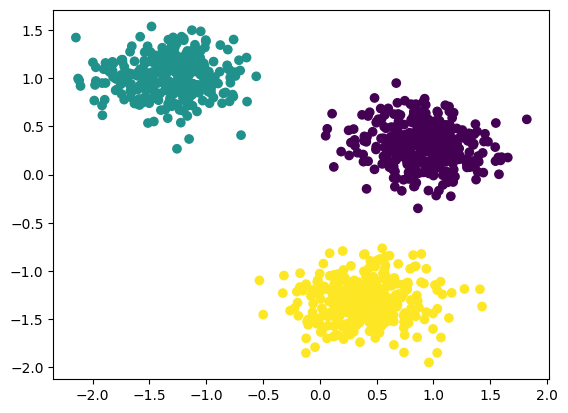

In [36]:
plt.scatter(x[:,0],x[:,1],c=y_pred)

In [39]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x,y_pred))

0.7553006984818446


Method 2 to determine k: Silhotte Scoring

In [41]:
silhouetter=[]
for i in range(2,11):
    model=KMeans(n_clusters=i,init='k-means++')
    model.fit(x)
    score=silhouette_score(x,model.predict(x))
    silhouetter.append(score)

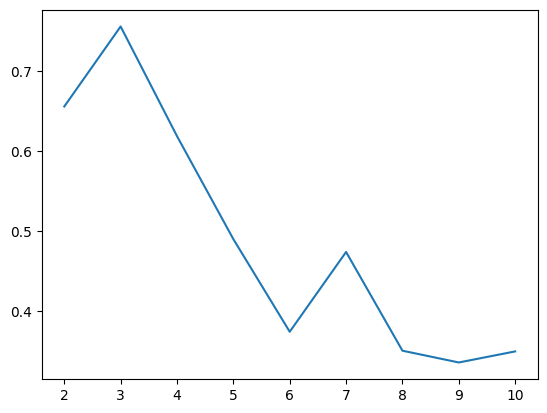

In [42]:
plt.plot(range(2,11),silhouetter)